In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df = pd.read_csv('medical_examination.csv')

In [62]:
df['BMI'] = df['weight']/((df['height']* 0.01)**2)

In [63]:
def ovrwt(bmi):
    if bmi > 25:
        return 1
    else:
        return 0

In [64]:
df['overweight'] = df['BMI'].apply(ovrwt)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


In [65]:
def normalize(parameter_value):
    if parameter_value == 1:
        return 0
    if parameter_value > 1:
        return 1

In [66]:
df['gluc'] = df['gluc'].apply(normalize)
df['cholesterol'] = df['cholesterol'].apply(normalize)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [67]:
cat_df = pd.melt(df, id_vars= 'cardio', value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
cat_df

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [68]:
dis_mask = cat_df['cardio'] == 1
disease = cat_df[dis_mask]
cat_df

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [73]:
dis_mask = cat_df['cardio'] == 1
disease = cat_df[dis_mask]
no_disease = cat_df[~dis_mask]


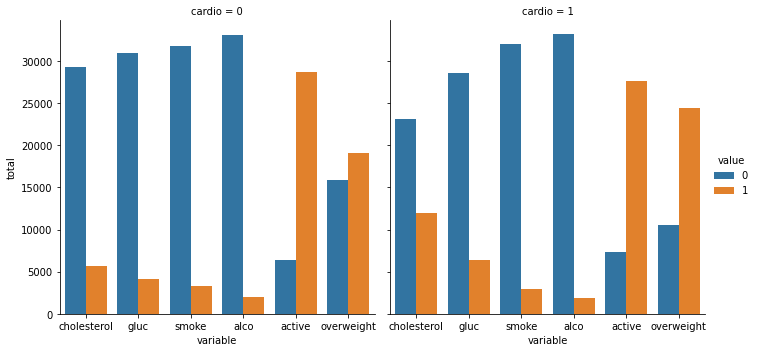

In [80]:

fig = sns.catplot(x = 'variable', kind = 'count', data = cat_df, hue = 'value', col= 'cardio')
fig.set(ylabel = 'total')
fig

In [82]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [89]:
bp_mask = (df['ap_lo'] <= df['ap_hi'])
ht_mask = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] < df['height'].quantile(0.975))
wt_mask = (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))

df_clean = df[bp_mask & ht_mask & wt_mask]
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [91]:
corr = df_clean.corr()

In [107]:
mask = np.triu(np.ones_like(corr, dtype=bool))
corr[mask]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cardio,0.003898,0.240419,0.003424,-0.023961,0.171317,0.052045,0.327413,0.203942,0.089089,-0.020403,-0.011060,-0.036617,NaN,NaN,NaN
cardio,0.003898,0.240419,0.003424,-0.023961,0.171317,0.052045,0.327413,0.203942,0.089089,-0.020403,-0.011060,-0.036617,NaN,NaN,NaN
BMI,0.000400,0.110672,-0.133464,-0.267219,0.868002,0.027332,0.216913,0.165632,0.120201,-0.041882,0.012647,-0.011619,0.181286,NaN,NaN
BMI,0.000400,0.110672,-0.133464,-0.267219,0.868002,0.027332,0.216913,0.165632,0.120201,-0.041882,0.012647,-0.011619,0.181286,NaN,NaN


([<matplotlib.axis.YTick at 0x1626a8036d0>,
 [Text(0, 0, 'id'),
  Text(0, 1, 'age'),
  Text(0, 2, 'gender'),
  Text(0, 3, 'height'),
  Text(0, 4, 'weight'),
  Text(0, 5, 'ap_hi'),
  Text(0, 6, 'ap_lo'),
  Text(0, 7, 'cholesterol'),
  Text(0, 8, 'gluc'),
  Text(0, 9, 'smoke'),
  Text(0, 10, 'alco'),
  Text(0, 11, 'active'),
  Text(0, 12, 'cardio'),
  Text(0, 13, 'BMI'),
  Text(0, 14, 'overweight')])

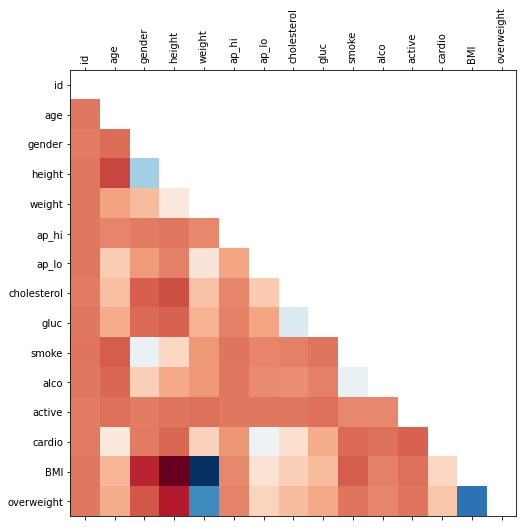

In [95]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);


<AxesSubplot:>

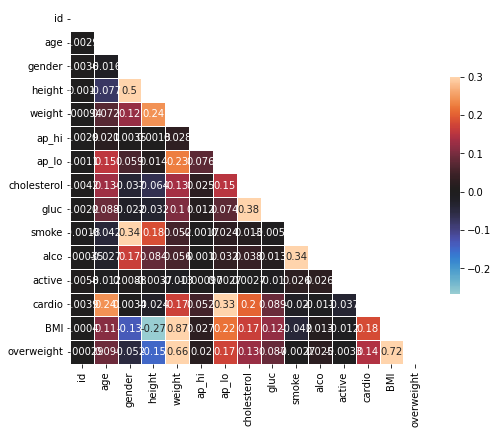

In [111]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(corr, mask=mask, annot= True, fmt = '0.2f', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})